In [1]:
import os 
import sys 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import subprocess
import shlex

repo_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(repo_root)

from src.utils.c_operation_helpers import  run_simulation_convergence
from figure_settings.settings import * 

In [2]:
DATASET_PATH = os.path.join(repo_root, 'datasets')

In [11]:

def average_convergence (filein_idx, filein_data, is_synthetic, T):
    
    ho = []
    z = []
    bin = []
    binz = []

    for t in range(0, T):
        results_dict = run_simulation_convergence(filein_idx, filein_data, is_synthetic)
        ho.append(len(results_dict['HO']['rms_convergence_criteria']))
        z.append(len(results_dict['Z']['rms_convergence_criteria']))
        bin.append(len(results_dict['BIN']['rms_convergence_criteria']))
        binz.append(len(results_dict['BINZ']['rms_convergence_criteria']))
        
    print("============== Iterations until convergence ==============")
    print(f" Ours- Higher Order: { np.mean(ho)}")
    print(f" Zermello- Higher Order: { np.mean(z)}")
    print(f" Ours- binary: { np.mean(bin)}")
    print(f" Zermello- bin: { np.mean(binz)}")
        

def plot_convergence(convergence_results_dict):
    # Iterate through each category in the dictionary
    plt.figure(figsize=(10, 6))
   
    plt.loglog(convergence_results_dict['HO']['rms_convergence_criteria'][:1000], label=LABELS['HO_BT'] + '(Ours)', color='black', linestyle='-' )
    plt.loglog(convergence_results_dict['Z']['rms_convergence_criteria'][:1000], label='Plackett-Luce(Zermelo)', color='orange', linestyle='-')
    plt.loglog(convergence_results_dict['BIN']['rms_convergence_criteria'][:1000], label=LABELS['BIN'] + '(Ours)', color='black',linestyle='--')
    plt.loglog(convergence_results_dict['BINZ']['rms_convergence_criteria'][:1000], label='Bradley-Terry(Zermelo)', color='orange',linestyle='--')

    # plt.grid(visible=True, which='both', linestyle='--', linewidth=0.25)
    plt.xlabel("Iterations")
    plt.ylabel("RMS Error")
    plt.title(f"Iterations until convergence", fontweight="bold", fontsize=14)
    plt.legend(loc="best")
    plt.savefig('figures/Convergence.png')
    plt.show()






## Synthetic

#### N-1000, M-1000,K1-2, K2-10, L-0

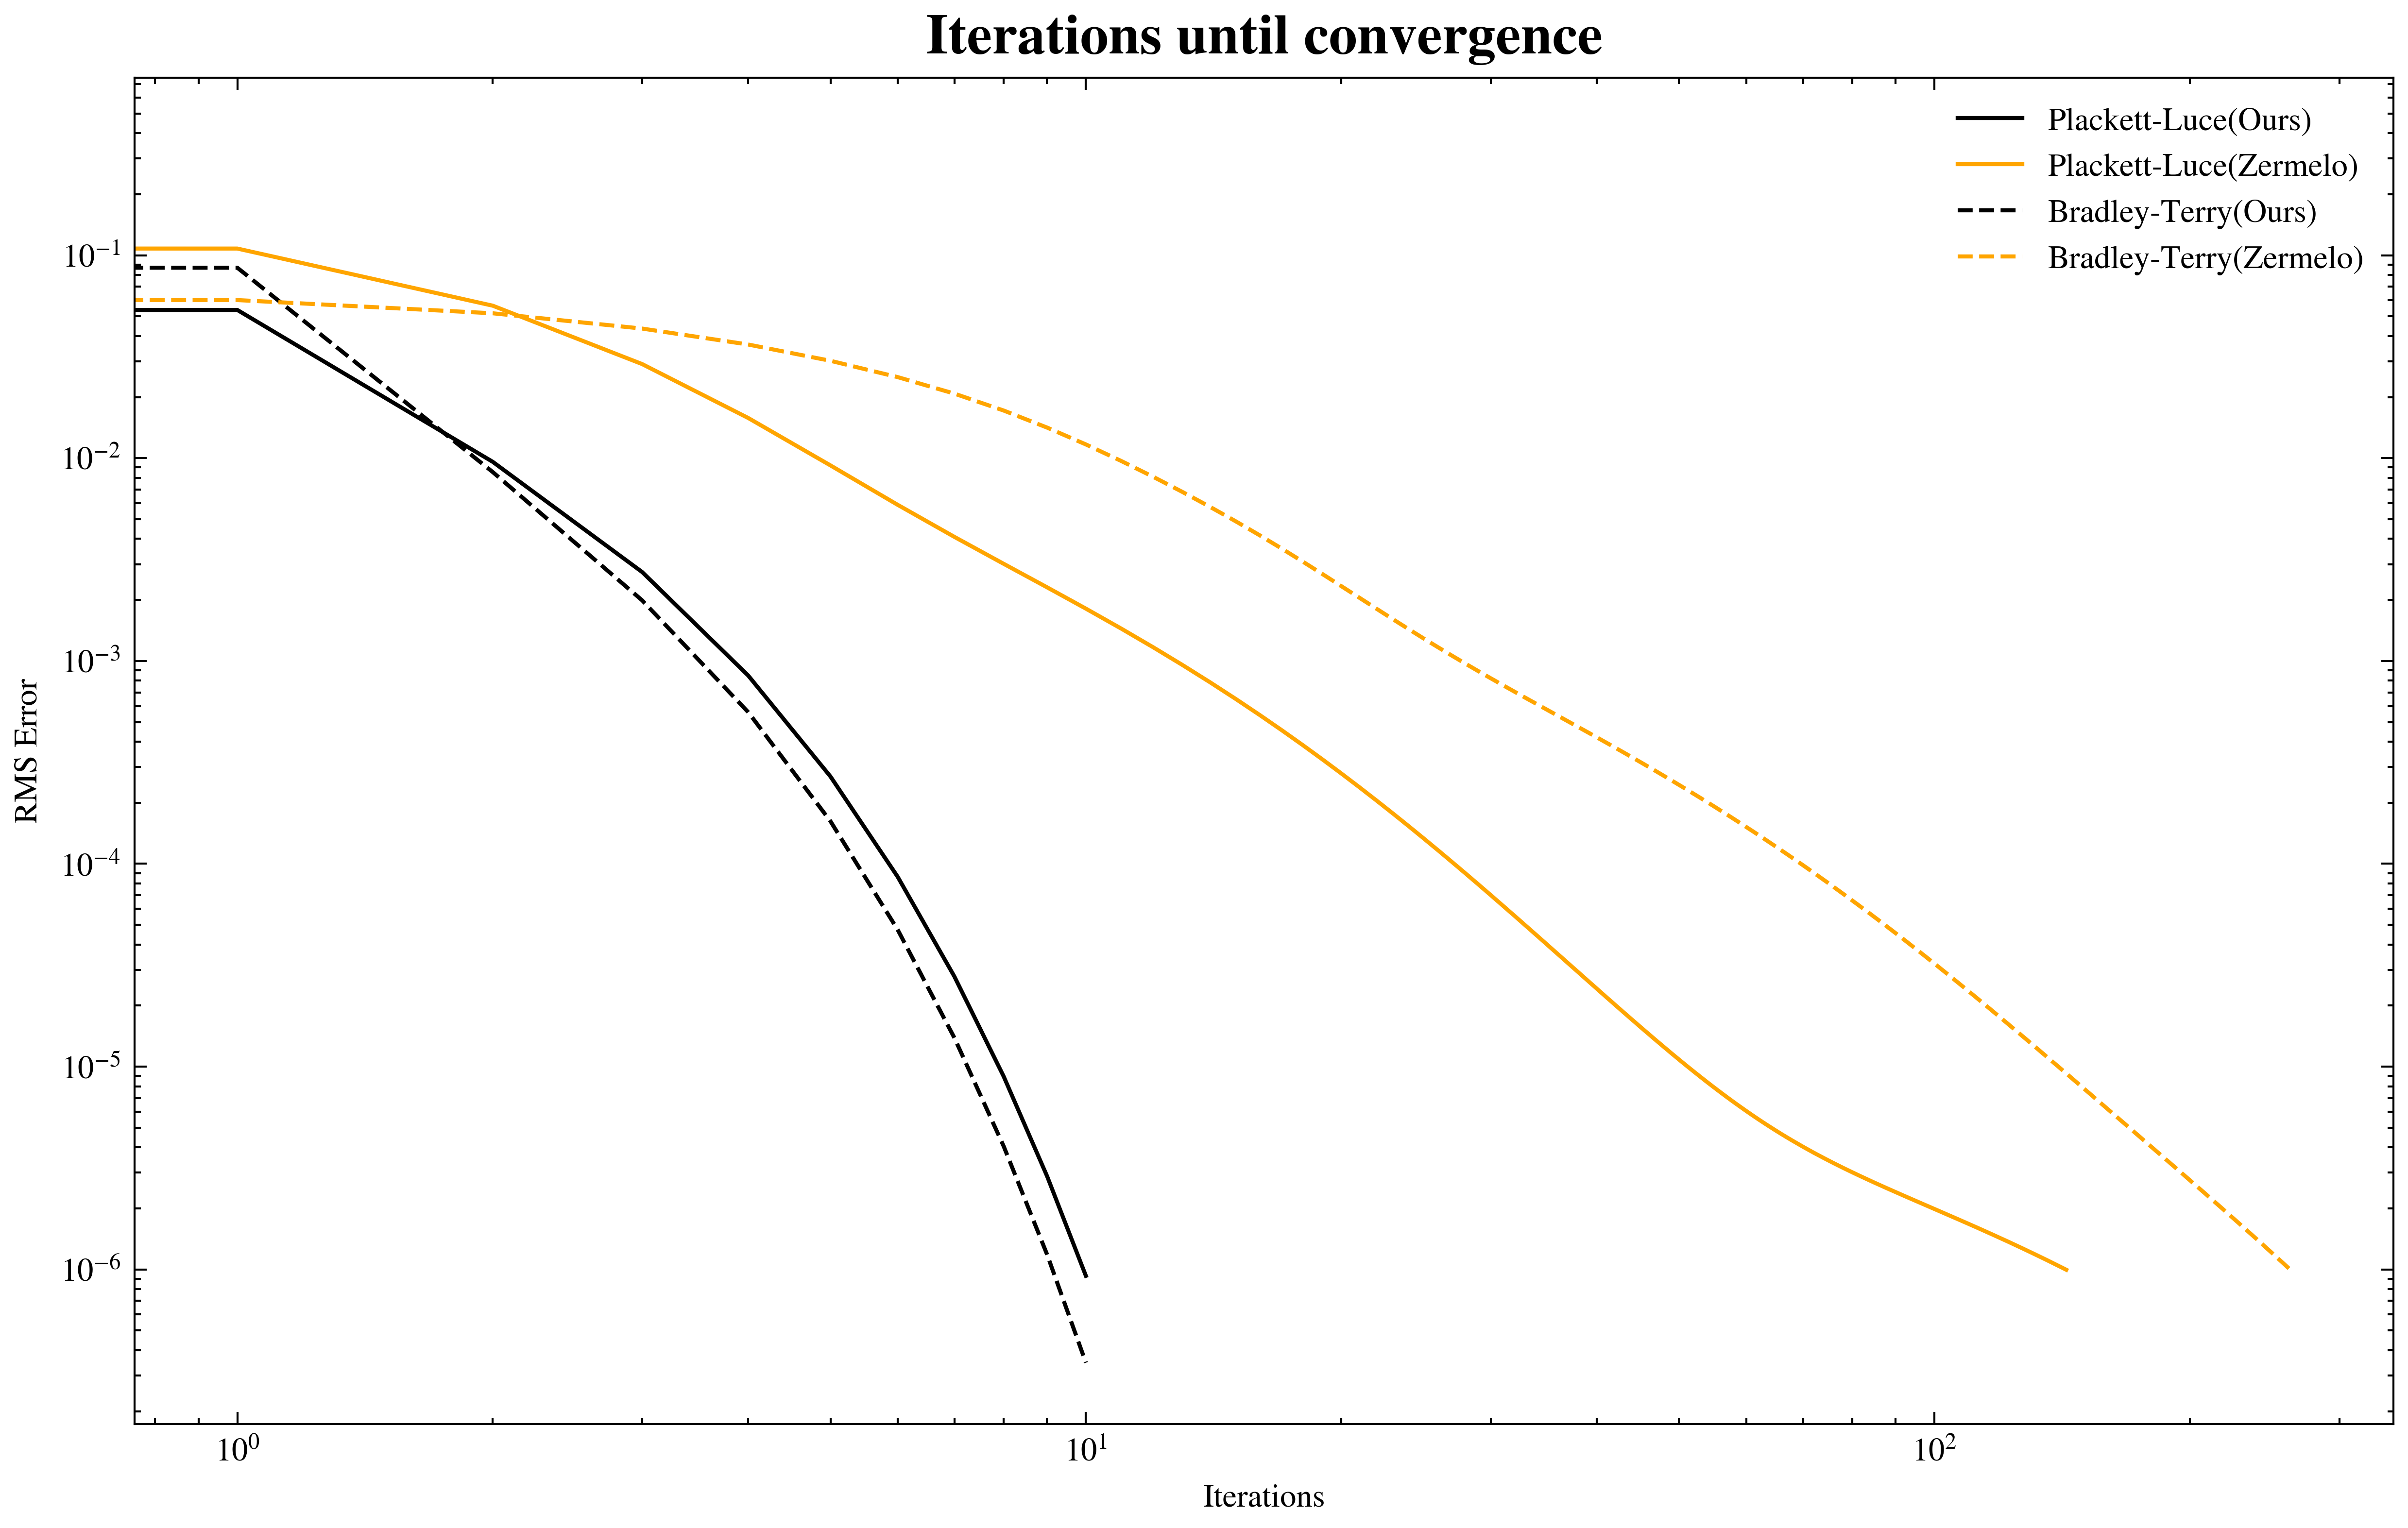

In [12]:
filein_idx = os.path.join(DATASET_PATH, 'Real_Data/00008_nodes.txt')
filein_data = os.path.join(DATASET_PATH, 'Real_Data/00008_edges.txt')

data_cl = run_simulation_convergence(filein_idx, filein_data, is_synthetic=1)
plot_convergence(data_cl)

## Real

### UCL 

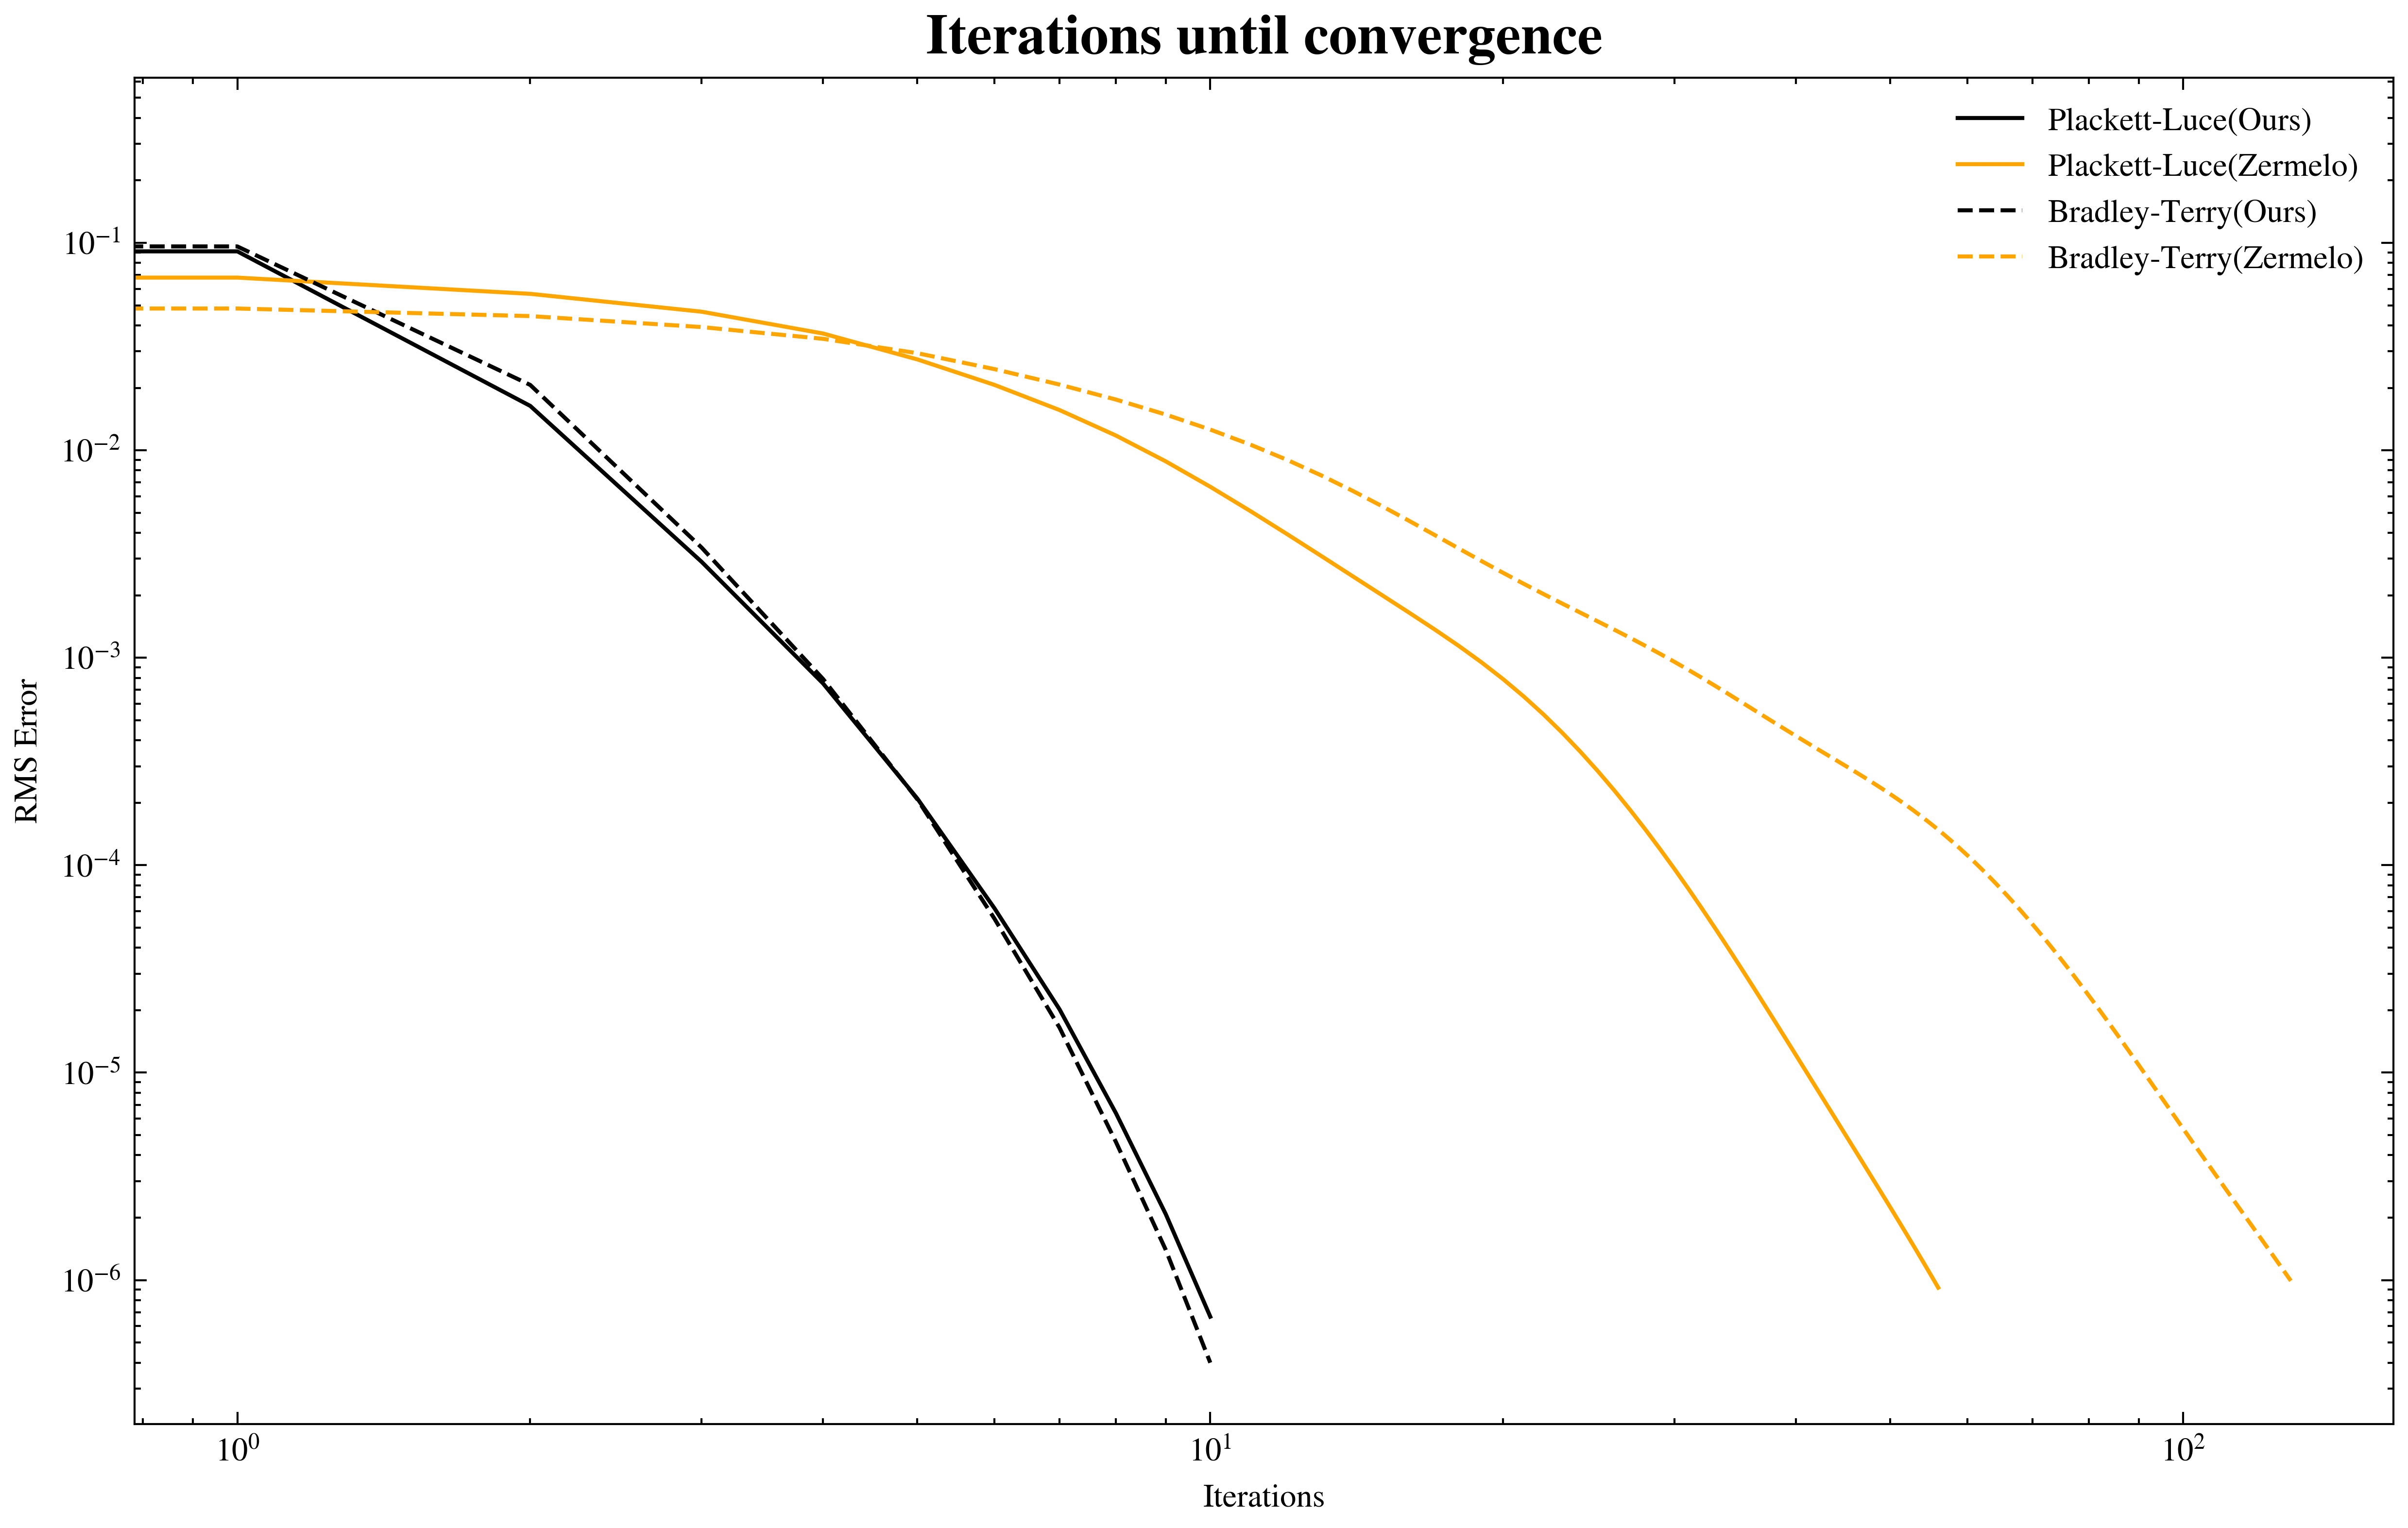

In [5]:
filein_idx = os.path.join(DATASET_PATH, 'Real_Data/00002_nodes.txt')
filein_data = os.path.join(DATASET_PATH, 'Real_Data/00002_edges.txt')

ratio = 0.8

data_cl = run_simulation_convergence(filein_idx, filein_data, is_synthetic=0)
plot_convergence(data_cl)


#### Authorship

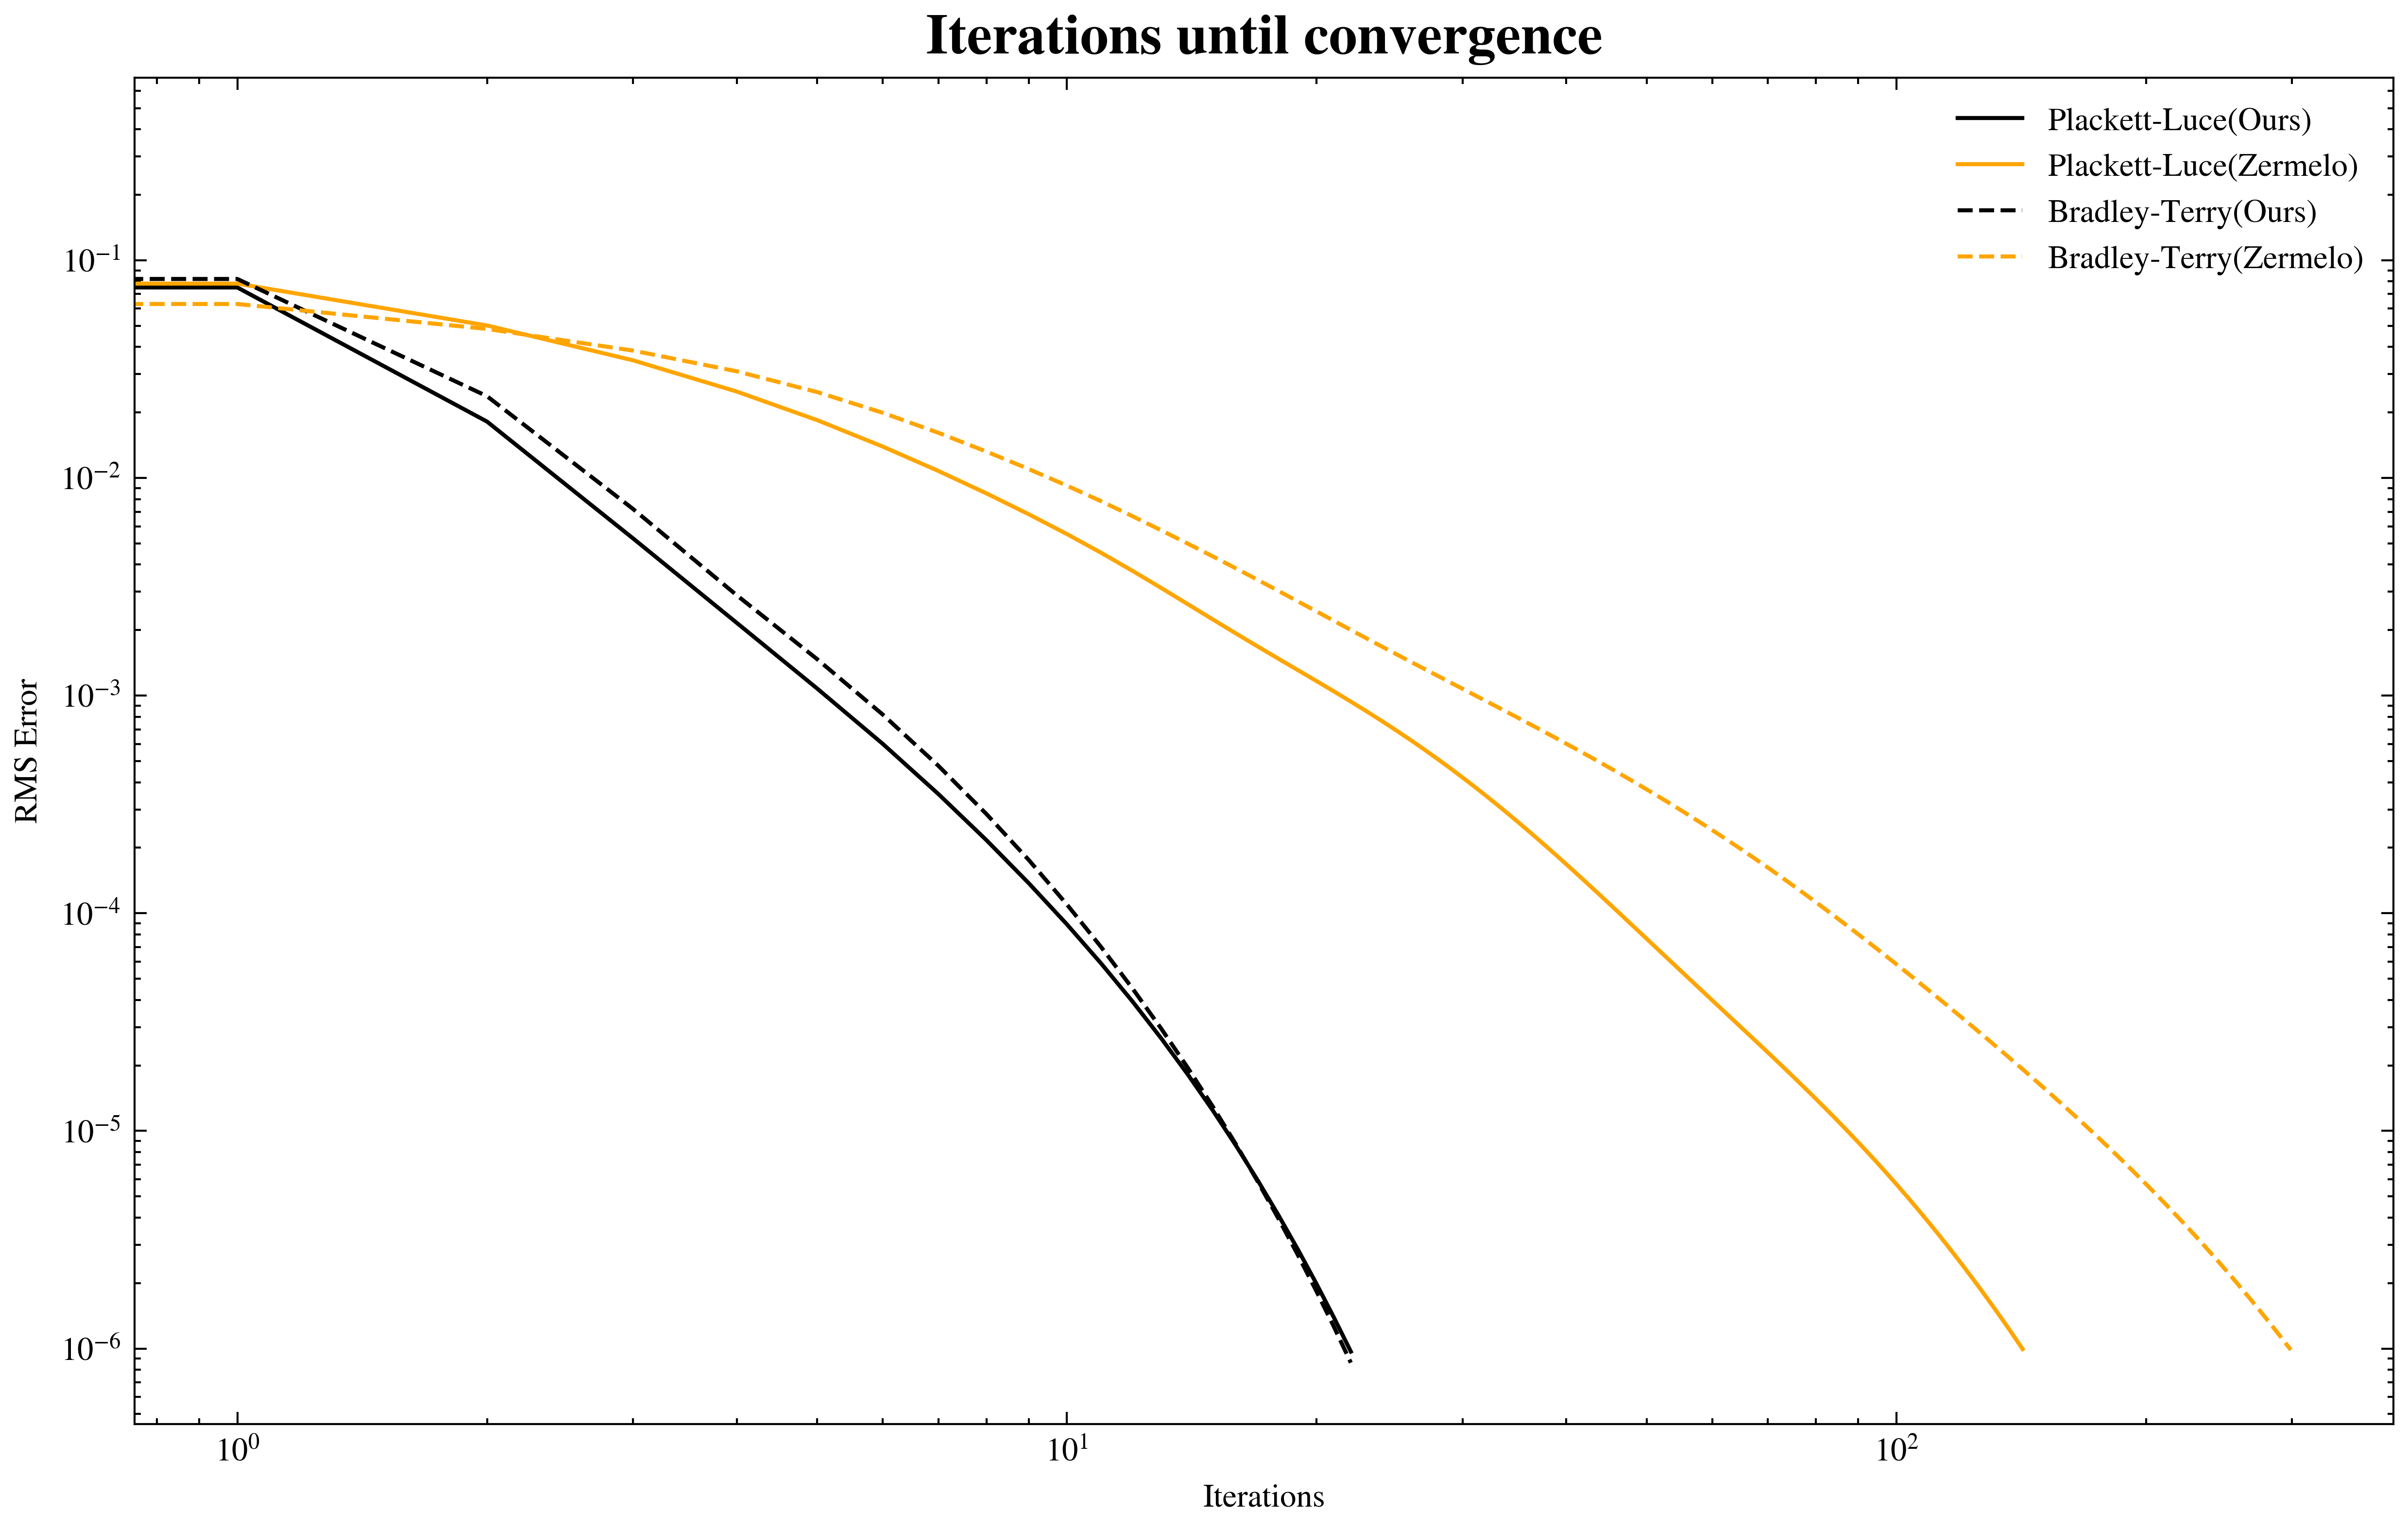

In [6]:
filein_idx = os.path.join(DATASET_PATH, 'Real_Data/00007_nodes.txt')
filein_data = os.path.join(DATASET_PATH, 'Real_Data/00007_edges.txt')

result = run_simulation_convergence(filein_idx, filein_data, is_synthetic=0)
plot_convergence(result)

In [7]:
filein_idx = os.path.join(DATASET_PATH, 'Real_Data/00007_nodes.txt')
filein_data = os.path.join(DATASET_PATH, 'Real_Data/00007_edges.txt')

T = 20
average_convergence(filein_idx, filein_data, 0, T)

============== Iterations until convergence ==============
 Ours- Higher Order: 23.9
 Zermello- Higher Order: 140.8
 Ours- binary: 25.85
 Zermello- bin: 291.4


#### AGH Course Selection

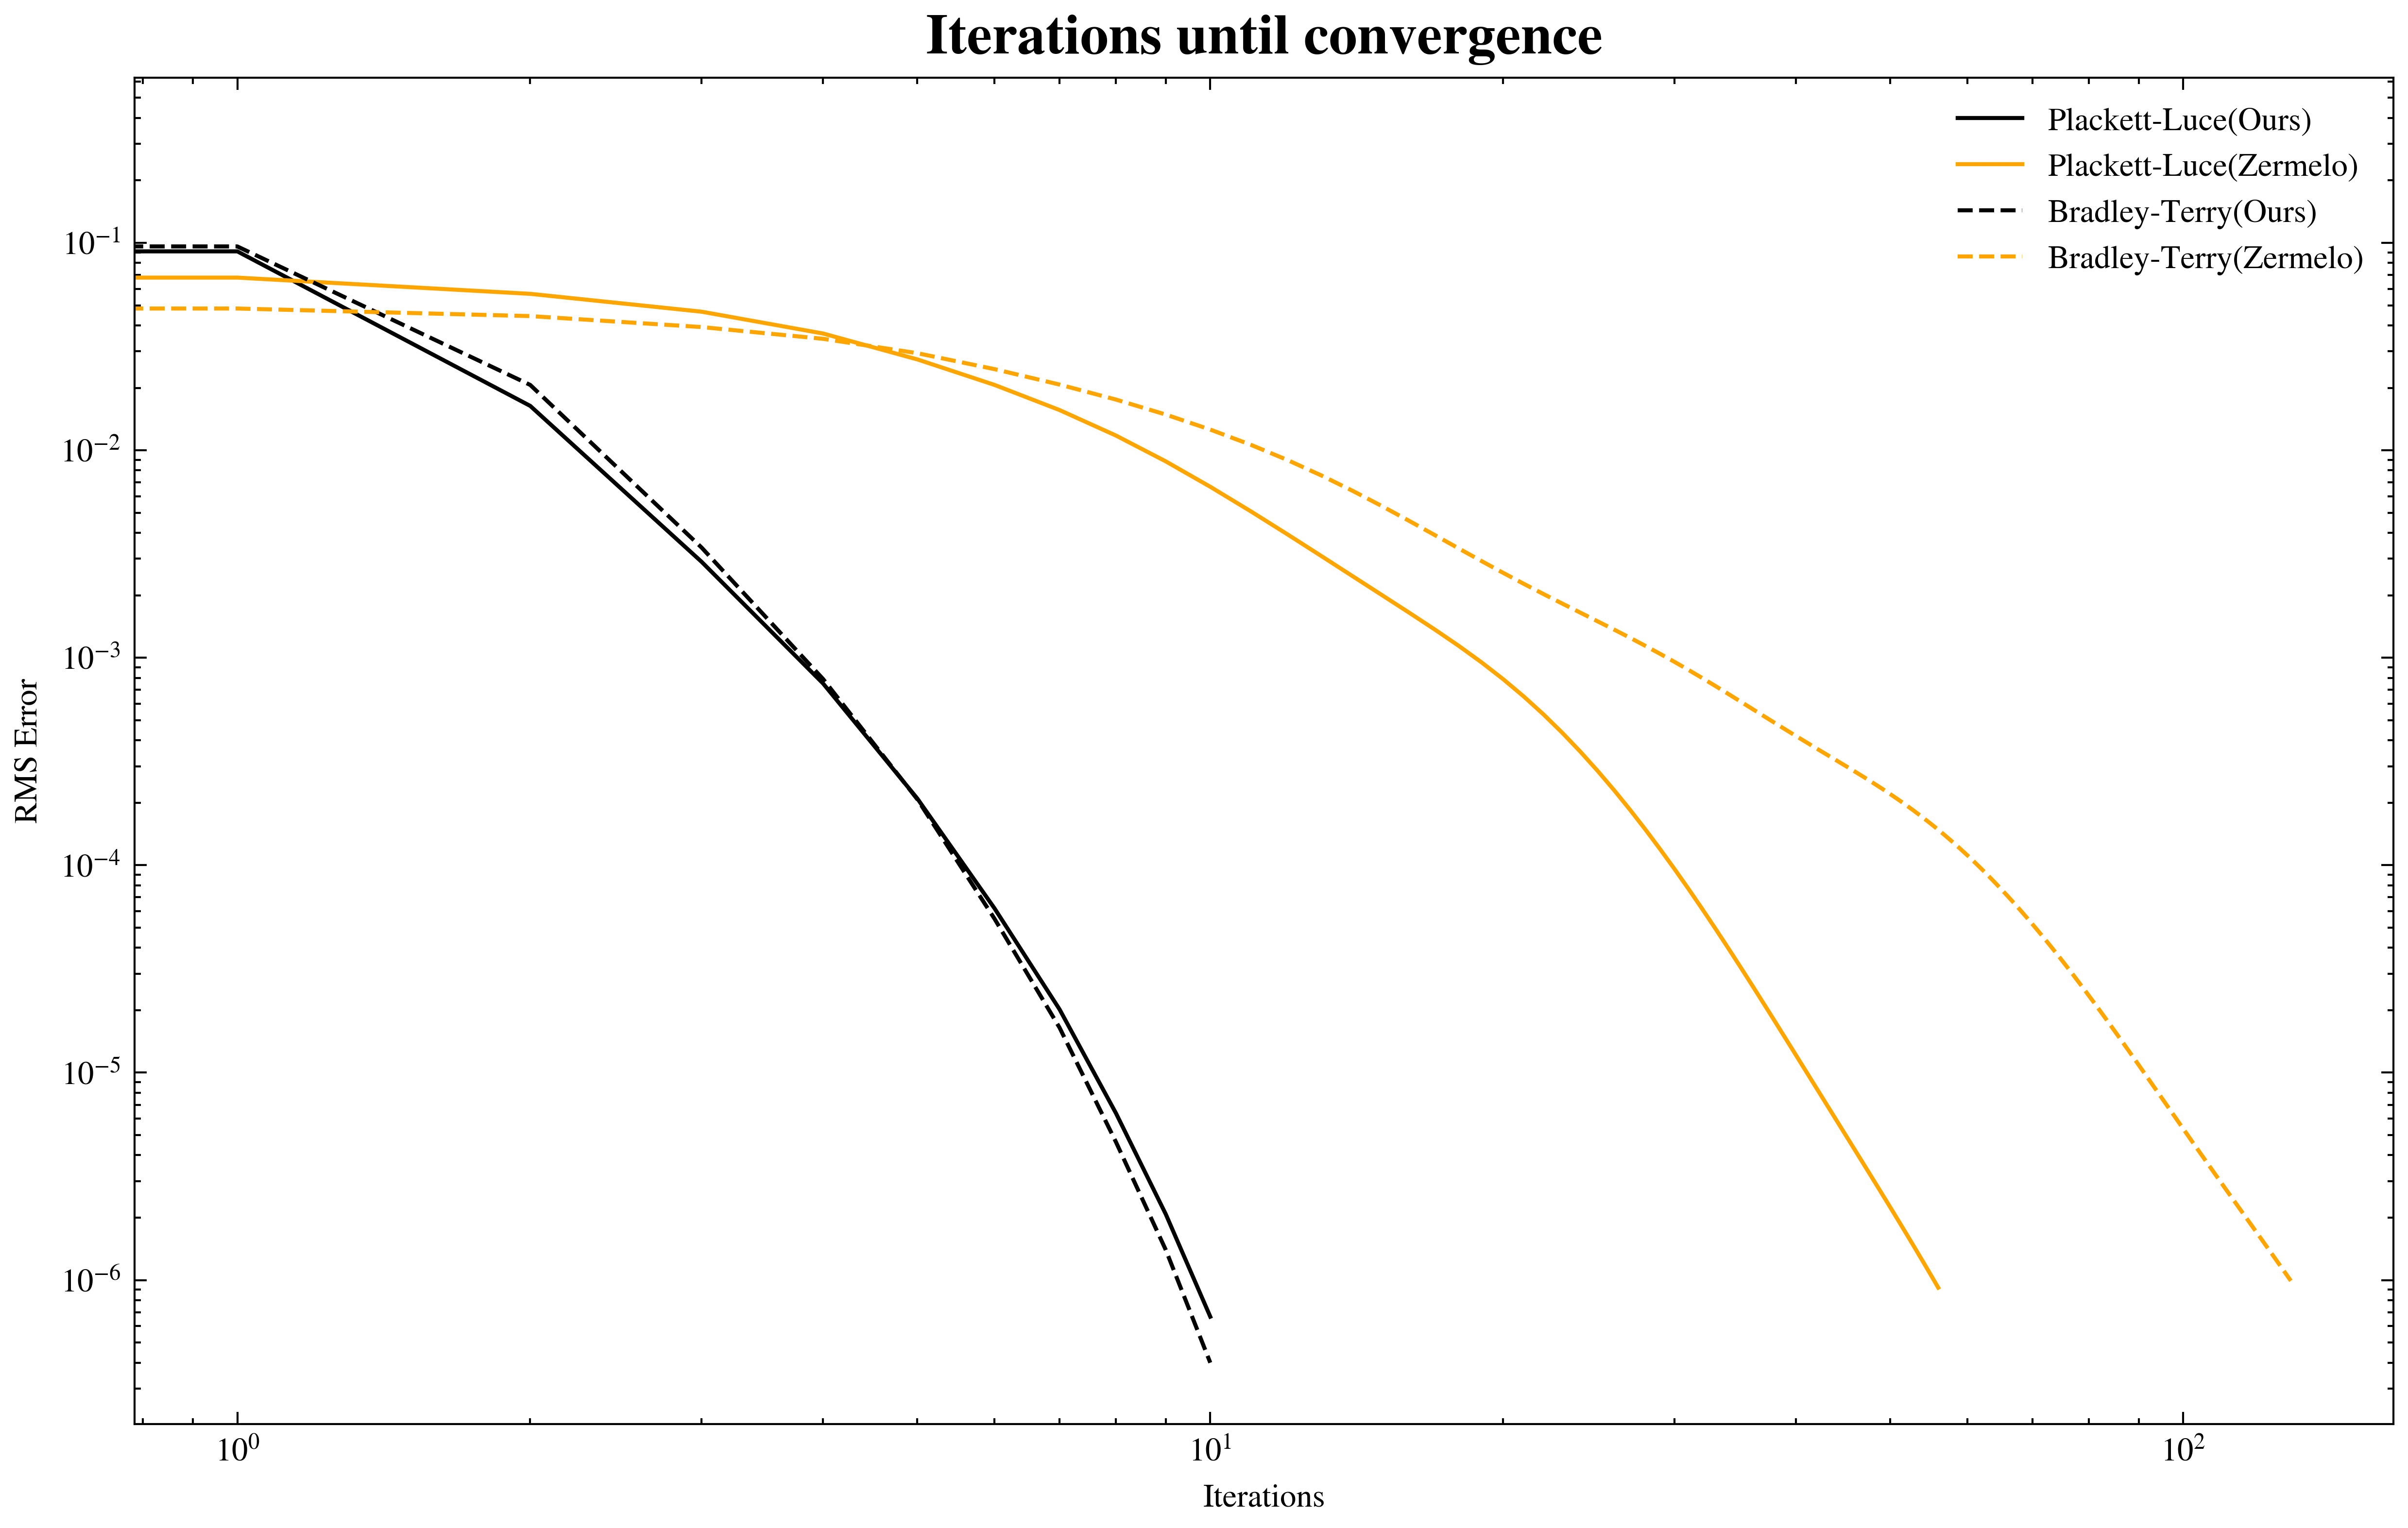

In [8]:
filein_idx = os.path.join(DATASET_PATH, 'Real_Data/00005_nodes.txt')
filein_data = os.path.join(DATASET_PATH, 'Real_Data/00005_edges.txt')

result = run_simulation_convergence (filein_idx, filein_data, is_synthetic=0)
plot_convergence(data_cl)